In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

# Set notebook preferences for visualization
sns.set_theme(style="whitegrid", palette="pastel")
%matplotlib inline

# ---------------------- Load Data ----------------------

# Define file path
DATA_PATH = 'C:/Users/SHRI/Documents/DS/DS_Projects/Employment_Analysis/data/transformed_data.csv'

# Load the dataset
data = pd.read_csv(DATA_PATH)
print(f"Data Loaded Successfully. Shape: {data.shape}")

# Create a folder to save figures
OUTPUT_PATH = 'outputs/visualization'
os.makedirs(OUTPUT_PATH, exist_ok=True)

# Display a preview of the data
data.head()


Data Loaded Successfully. Shape: (49653, 142)


,EmployeeID,orighiredate_key,terminationdate_key,age,length_of_service,store_name,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,...,city_name_surrey,city_name_terrace,city_name_trail,city_name_valemount,city_name_vancouver,city_name_vernon,city_name_victoria,city_name_west vancouver,city_name_white rock,city_name_williams lake
0,1318,1989-08-28,1900-01-01,0.798492,1.037972,35,not applicable,not applicable,2006,active,...,False,False,False,False,True,False,False,False,False,False
1,1319,1989-08-28,1900-01-01,0.878961,1.196069,35,not applicable,not applicable,2007,active,...,False,False,False,False,True,False,False,False,False,False
2,1320,1989-08-28,1900-01-01,0.959430,1.354166,35,not applicable,not applicable,2008,active,...,False,False,False,False,True,False,False,False,False,False
3,1321,1989-08-28,1900-01-01,1.039899,1.512264,35,not applicable,not applicable,2009,active,...,False,False,False,False,True,False,False,False,False,False
4,1322,1989-08-28,1900-01-01,1.120368,1.670361,35,not applicable,not applicable,2010,active,...,False,False,False,False,True,False,False,False,False,False


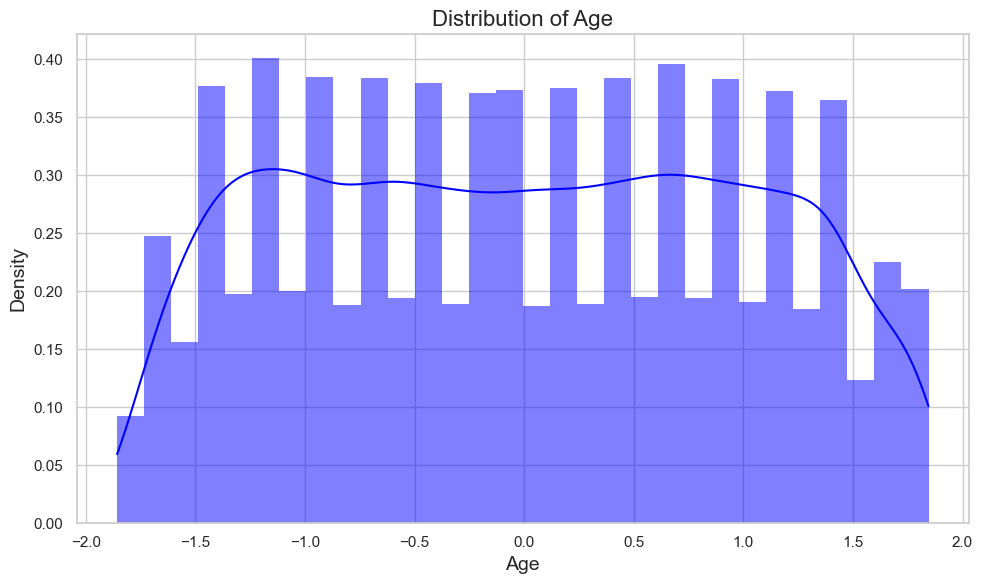

In [1]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=30, color='blue', stat="density", linewidth=0)
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, 'distribution_age.png'))
plt.show()


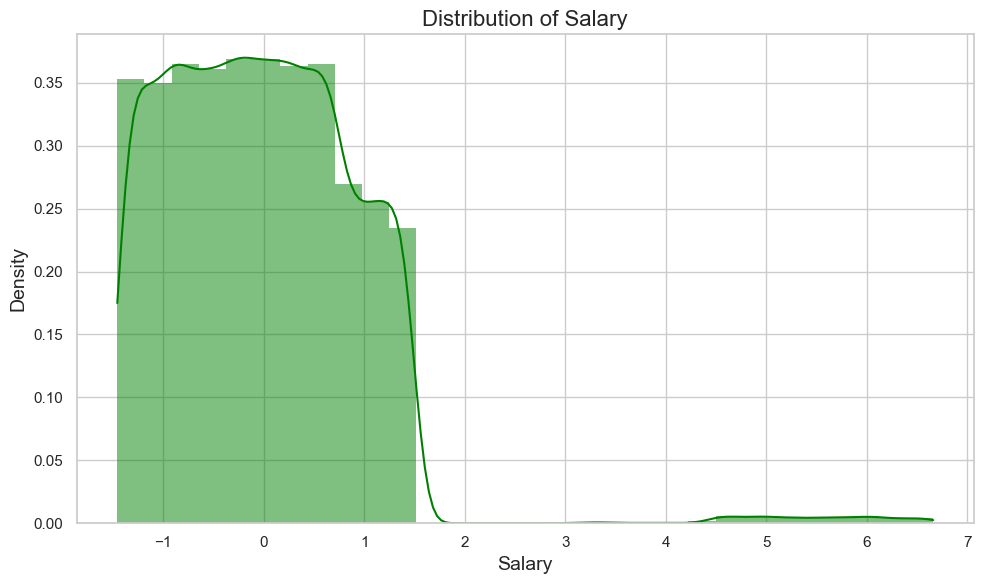

In [2]:
# Distribution of Salary
plt.figure(figsize=(10, 6))
sns.histplot(data['salary'], kde=True, bins=30, color='green', stat="density", linewidth=0)
plt.title('Distribution of Salary', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, 'distribution_salary.png'))
plt.show()


C:\Users\SHRI\AppData\Local\Temp\ipykernel_10524\2132163554.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='salary', y='Job Title', data=salary_data, palette='coolwarm')


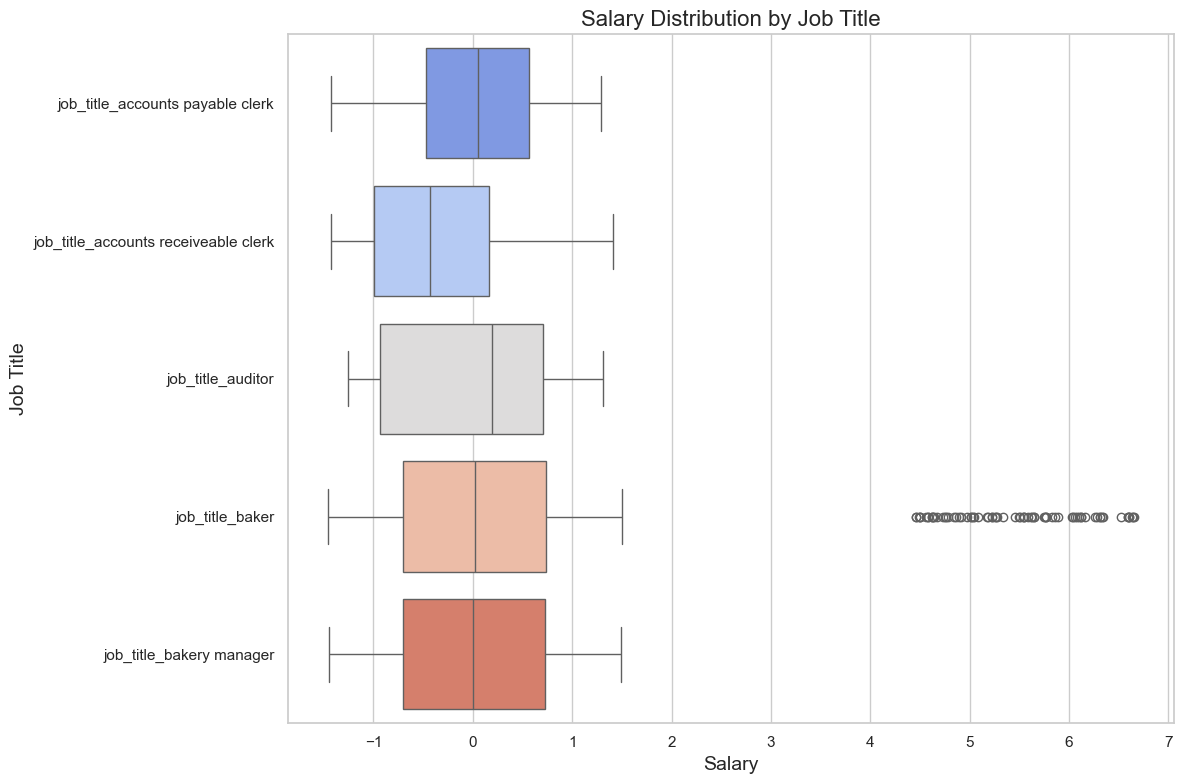

In [3]:
# Extract job title columns
job_title_columns = [col for col in data.columns if 'job_title' in col]
top_titles = job_title_columns[:5]
salary_data = data.melt(id_vars='salary', value_vars=top_titles, var_name='Job Title', value_name='Presence')
salary_data = salary_data[salary_data['Presence'] == 1]

# Boxplot for Salary by Job Titles
plt.figure(figsize=(12, 8))
sns.boxplot(x='salary', y='Job Title', data=salary_data, palette='coolwarm')
plt.title('Salary Distribution by Job Title', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Job Title', fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, 'salary_by_job_title.png'))
plt.show()


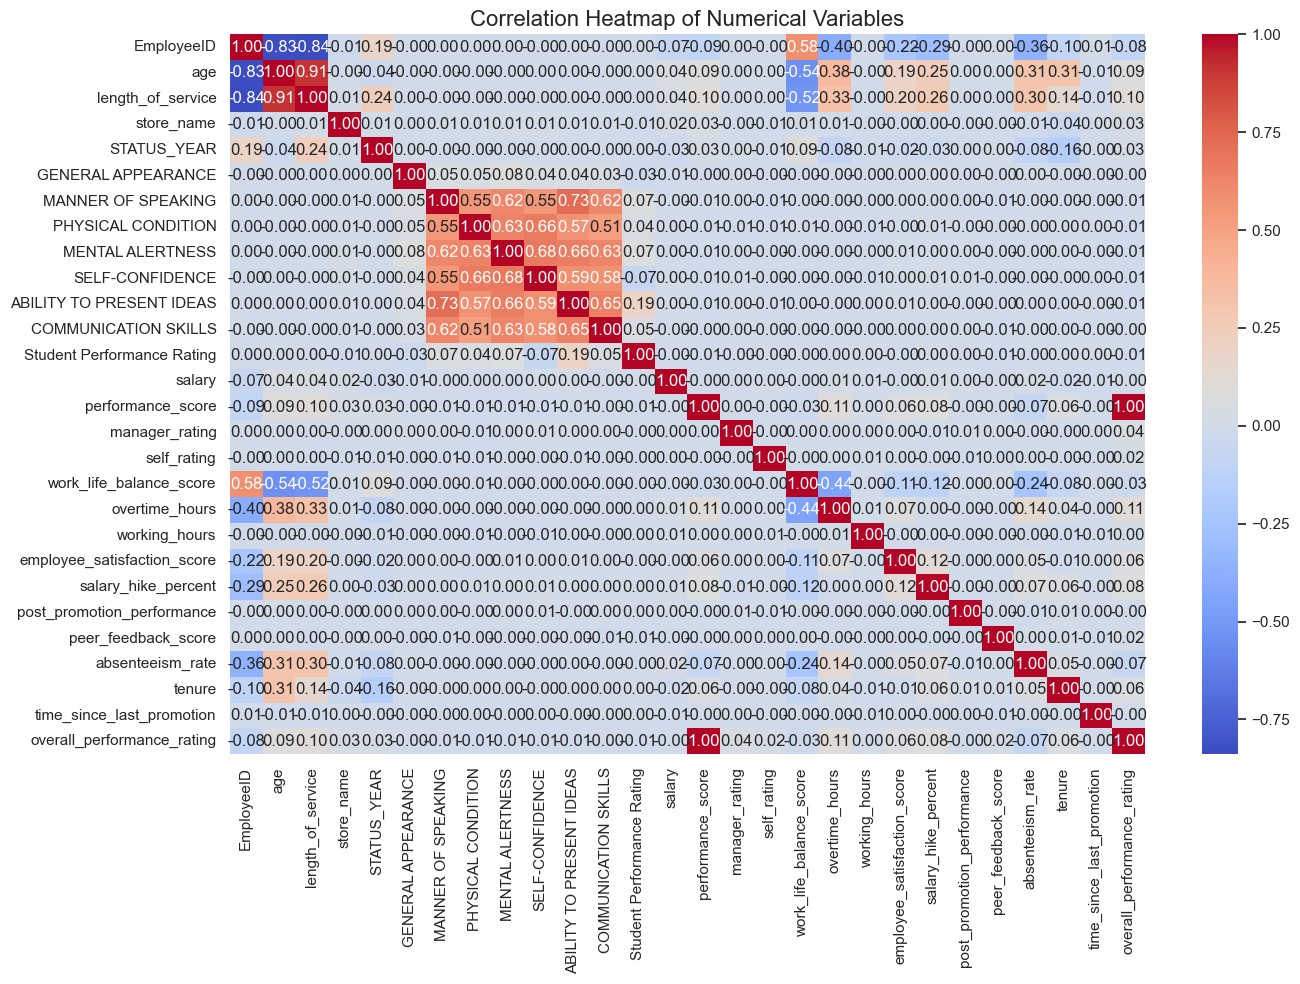

In [4]:
# Correlation Heatmap
numerical_columns = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, 'correlation_heatmap.png'))
plt.show()


In [11]:
# Extract Department Data
department_columns = [col for col in data.columns if 'department_name' in col]
top_departments = department_columns[:5]
department_data = data.melt(id_vars='salary', value_vars=top_departments, var_name='Department', value_name='Presence')
department_data = department_data[department_data['Presence'] == 1]

# Interactive Box Plot
fig = px.box(department_data, x="salary", y="Department",
             title="Salary by Department (Interactive)", 
             color="Department",
             color_discrete_sequence=px.colors.qualitative.Vivid)
fig.write_html(os.path.join(OUTPUT_PATH, 'interactive_salary_by_department.html'))


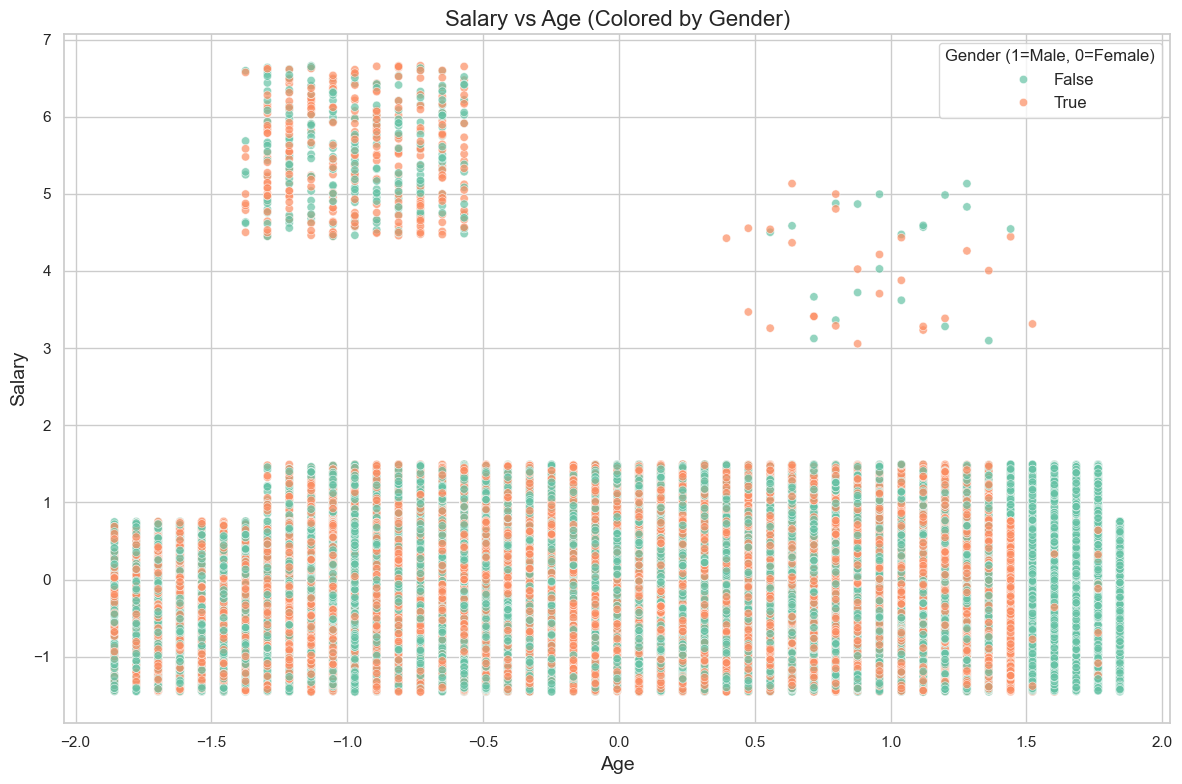

In [6]:
# Scatterplot Salary vs Age Colored by Gender
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='salary', hue='gender_full_male', data=data, palette='Set2', alpha=0.7)
plt.title('Salary vs Age (Colored by Gender)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.legend(title='Gender (1=Male, 0=Female)', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, 'salary_vs_age.png'))
plt.show()


C:\Users\SHRI\AppData\Local\Temp\ipykernel_10524\754237698.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




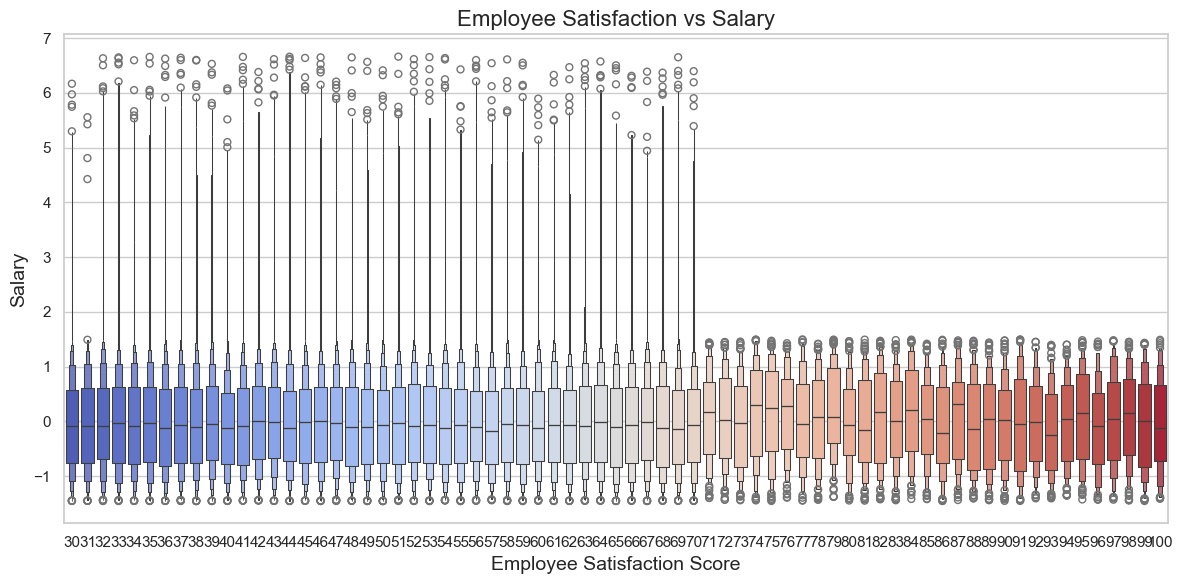

In [7]:
# Boxenplot for Employee Satisfaction vs Salary
plt.figure(figsize=(12, 6))
sns.boxenplot(x='employee_satisfaction_score', y='salary', data=data, palette='coolwarm')
plt.title('Employee Satisfaction vs Salary', fontsize=16)
plt.xlabel('Employee Satisfaction Score', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, 'satisfaction_vs_salary.png'))
plt.show()


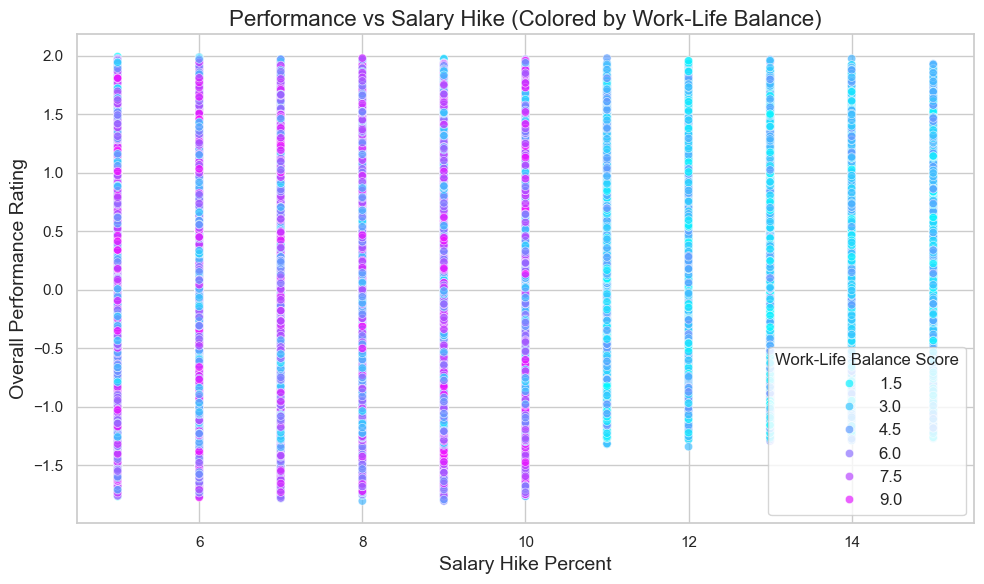

In [8]:
# Performance vs Salary Hike with Work-Life Balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='salary_hike_percent', y='overall_performance_rating', hue='work_life_balance_score', data=data, palette='cool', alpha=0.7)
plt.title('Performance vs Salary Hike (Colored by Work-Life Balance)', fontsize=16)
plt.xlabel('Salary Hike Percent', fontsize=14)
plt.ylabel('Overall Performance Rating', fontsize=14)
plt.legend(title='Work-Life Balance Score', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, 'performance_vs_salary_hike.png'))
plt.show()
